# Exploratory Data Analysis

## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

## Creating DataFrame

In [4]:
cwd = os.getcwd()
df = pd.read_csv(cwd+"/data/cleaned_BA_reviews.csv", index_col=0)

# checking if index is in order 
df = df.reset_index(drop=True)

In [5]:
df.head()

,reviews,stars,date,country,verified,corpus
0,Not Verified | A nightmare journey courtesy o...,5.0,2024-09-08,United Kingdom,False,verified nightmare journey courtesy british ai...
1,✅ Trip Verified | Absolutely atrocious. LHR-OR...,1.0,2024-09-06,United Kingdom,True,verified absolutely atrocious lhr ord lhr roun...
2,✅ Trip Verified | As someone who flies relentl...,1.0,2024-09-02,United Kingdom,True,verified someone fly relentlessly british airw...
3,✅ Trip Verified | Flew with British Airways ...,4.0,2024-09-01,United Kingdom,True,verified flew british airway club europe satur...
4,✅ Trip Verified | Straightforward check in T...,2.0,2024-08-30,United Kingdom,True,verified straightforward check new site club c...


## Average given rating

In [6]:
df.stars.mean()

4.440627843494085

## Total counts for each rating

Text(0.5, 0.98, 'Counts for each ratings')

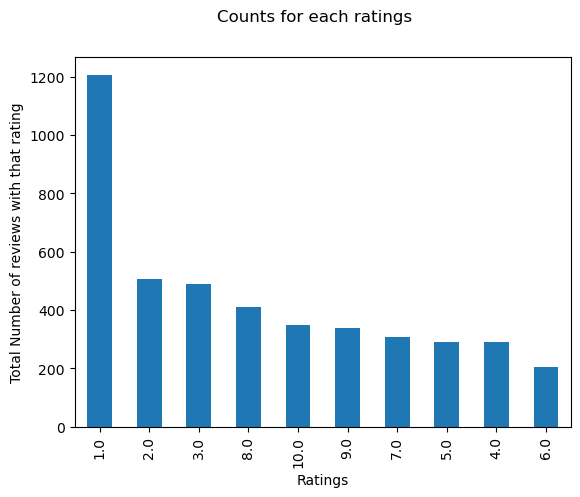

In [7]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [8]:
df_ratings = pd.DataFrame(df.stars.value_counts()).reset_index()
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [9]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()

In [10]:
# renaming columns
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [11]:
df_ratings

,Stars,total_counts,count,pct_values
0,0,1.0,1207,1.82
1,1,2.0,506,3.64
2,2,3.0,490,5.45
3,3,8.0,411,14.55
4,4,10.0,349,18.18
5,5,9.0,339,16.36
6,6,7.0,309,12.73
7,7,5.0,290,9.09
8,8,4.0,290,7.27
9,9,6.0,205,10.91


/tmp/ipykernel_12634/1467927732.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
/tmp/ipykernel_12634/1467927732.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,


Text(0.5, 1.0, 'Counts for each ratings')

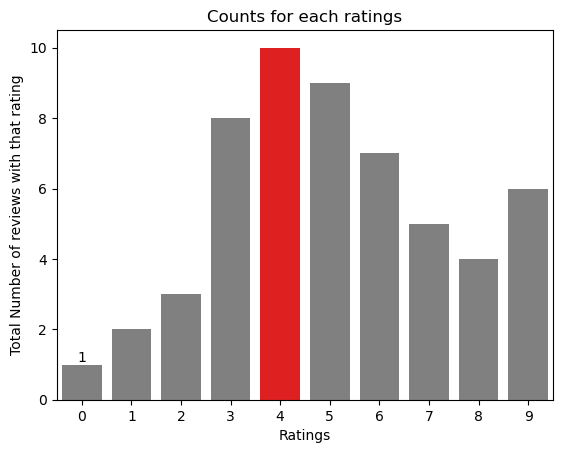

In [12]:

clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [13]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

70 unique countries


## Country that most review comes from

In [14]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [15]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

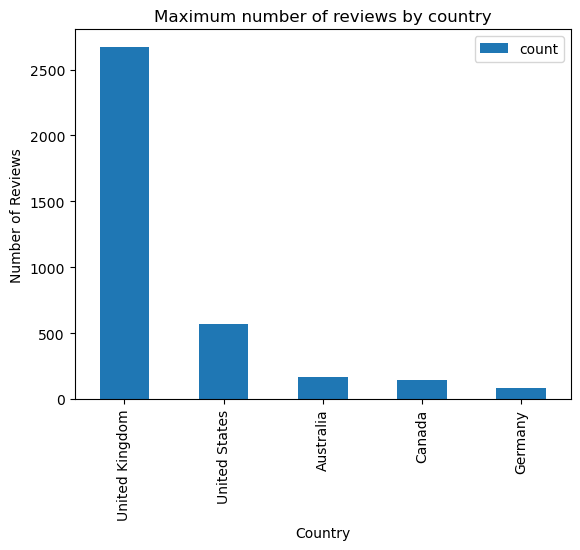

In [16]:
df_country_review.plot(kind="bar", x='total_reviews', y='count')
plt.title("Maximum number of reviews by country")
plt.xlabel("Country")
plt.ylabel("Number of Reviews")
plt.show()

## Which country provided on average highest ratings?

In [17]:
# Convert the 'stars' column to numeric, forcing errors to NaN
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

# Now group by 'country' and calculate the mean of the numeric 'stars' values
df_country_rating = df.groupby('country')['stars'].mean().sort_values(ascending=False).reset_index()

In [18]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 10 Countries with avg highest rating provided to British Airways')

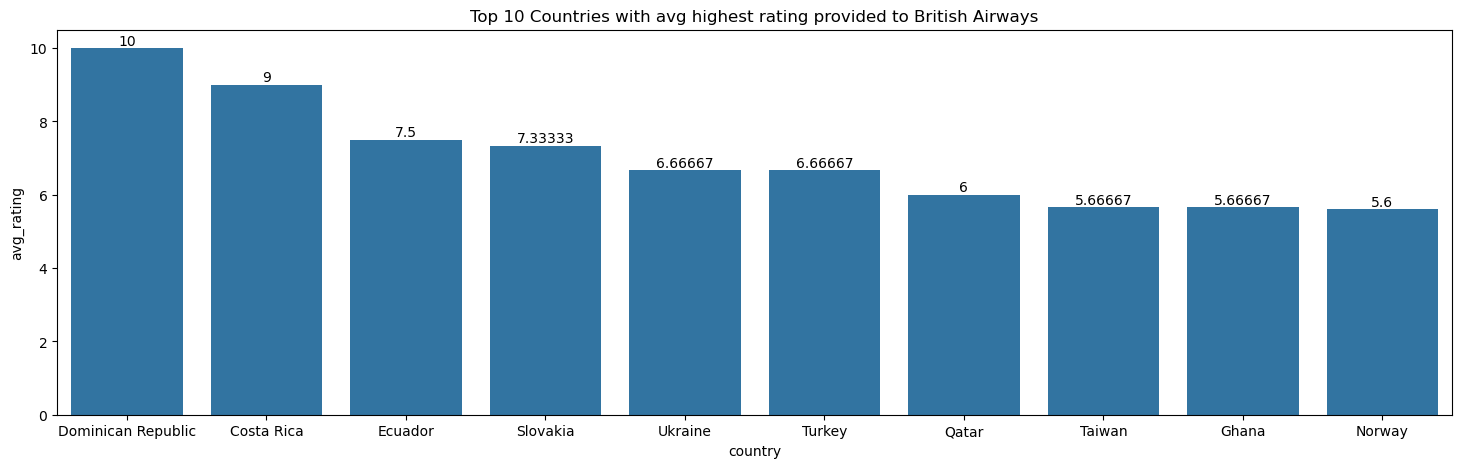

In [67]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:10])
ax.bar_label(ax.containers[0])
ax.set_title("Top 10 Countries with avg highest rating provided to British Airways")

## Last 10 Countries with lowest average rating provided

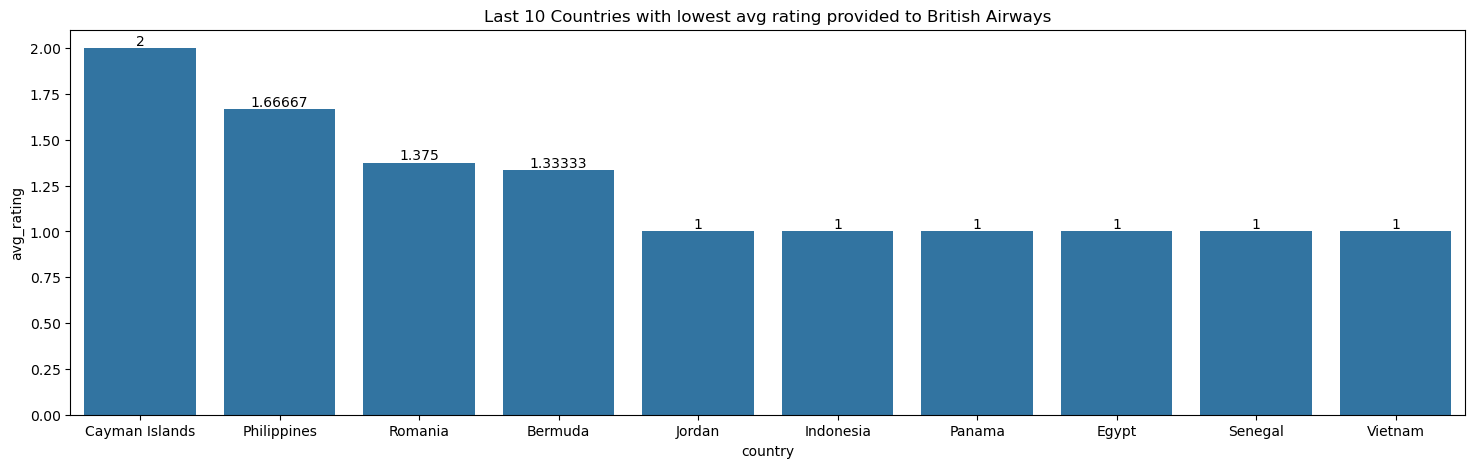

In [20]:
# Adjust to show the last 10 countries with the lowest average rating
fig, ax = plt.subplots(figsize=(18, 5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[-10:])
ax1.bar_label(ax1.containers[0])
ax.set_title("Last 10 Countries with lowest avg rating provided to British Airways")
plt.show()


## Time Series Analysis

In [21]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)

In [22]:
fig = px.line(df, x='date', y='stars')
fig.update_xaxes(rangeslider_visible=True)
fig.show(renderer='browser')

/usr/lib/python3/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


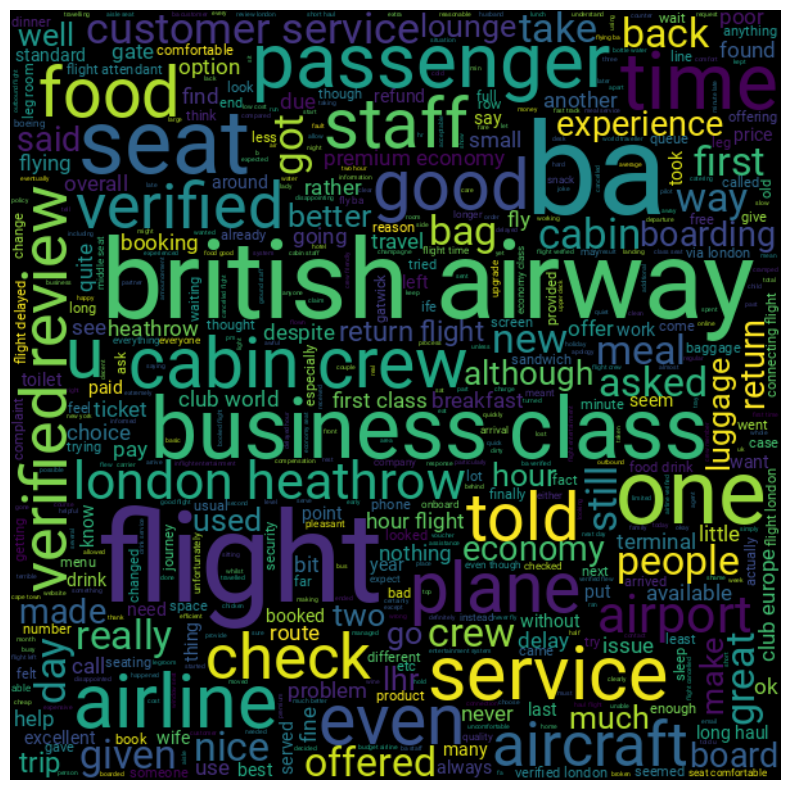

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re

# Start with one review:
reviews = " ".join(df.corpus.astype(str))

# Clean the text
reviews = re.sub(r'[^\x00-\x7F]+', ' ', reviews)

plt.figure(figsize=(20,10))

# Set stopwords
stopwords = set(STOPWORDS)

# Specify the font path based on your OS
font_path = 'Roboto-Regular.ttf'

# Create and generate a word cloud image:
wordcloud = WordCloud(
    height=600,
    width=600,
    max_font_size=100,
    max_words=500,
    stopwords=stopwords,
    font_path=font_path
).generate(reviews)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list. 


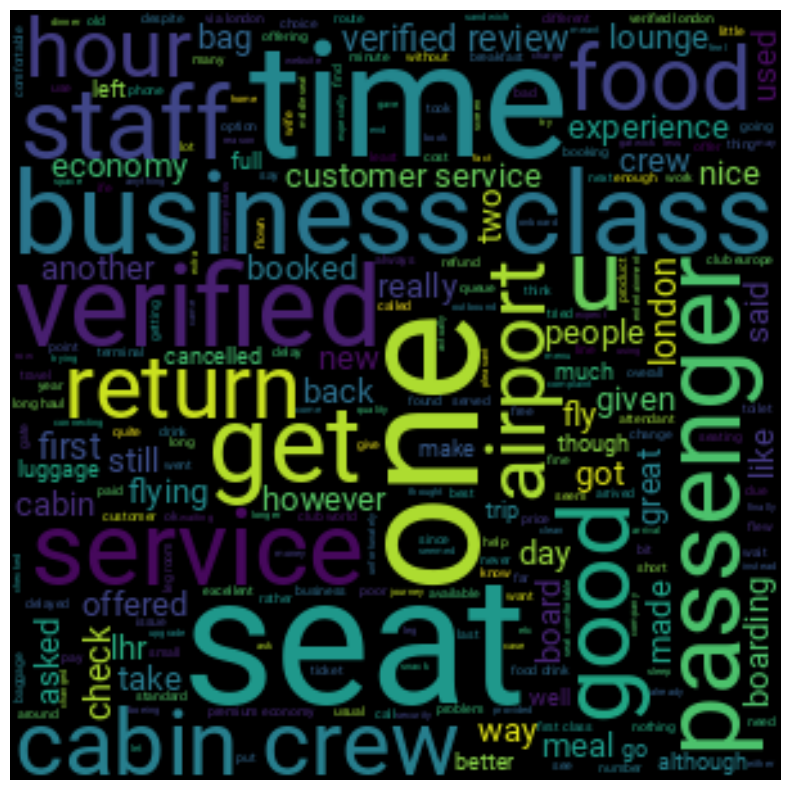

In [28]:
import nltk
from nltk.corpus import stopwords

reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))
stopwords = set(stopwords.words("english"))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
wordcloud = WordCloud(
    height=300,
    width=300,
    max_font_size=70,
    max_words=300,
    stopwords=stopwords,
    font_path=font_path
).generate(reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Frequency

In [32]:
from nltk.probability import FreqDist
from sklearn.feature_extraction import text

words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])

new_words = [word for word in words if word not in stopwords]

nlp_words = FreqDist(new_words).most_common(20)

#create dataframe of these words and its' frequencies
all_fdist =pd.Series(dict(nlp_words))


/tmp/ipykernel_12634/2668988824.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'verified'),
  Text(3, 0, 'time'),
  Text(4, 0, 'food'),
  Text(5, 0, 'crew'),
  Text(6, 0, 'hour'),
  Text(7, 0, 'class'),
  Text(8, 0, 'good'),
  Text(9, 0, 'cabin'),
  Text(10, 0, 'business'),
  Text(11, 0, 'staff'),
  Text(12, 0, 'check'),
  Text(13, 0, 'economy'),
  Text(14, 0, 'drink'),
  Text(15, 0, 'meal'),
  Text(16, 0, 'customer'),
  Text(17, 0, 'return'),
  Text(18, 0, 'lounge'),
  Text(19, 0, 'club')])

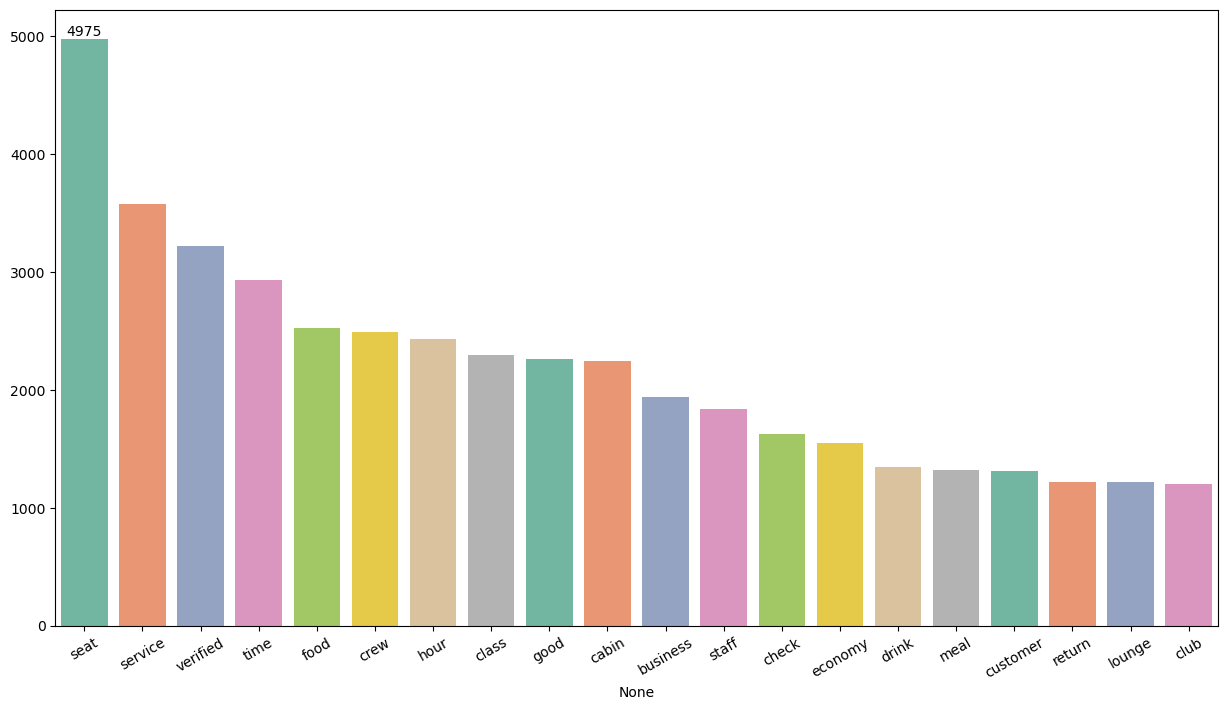

In [34]:
# Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

#Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax, palette="Set2")
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30) 

This gives us a glimpse of what customers are really talking about here. We see that Seat is most talked about the airline followed by "Service" and "food" which are all very important to customers in terms of service. However, we still do not know is how they are expressing about each of this service. To bring some significane to these terms we will use ngram plots to see if they are bad or good in experience. 

## Word Frequency with N-gram

<AxesSubplot: >

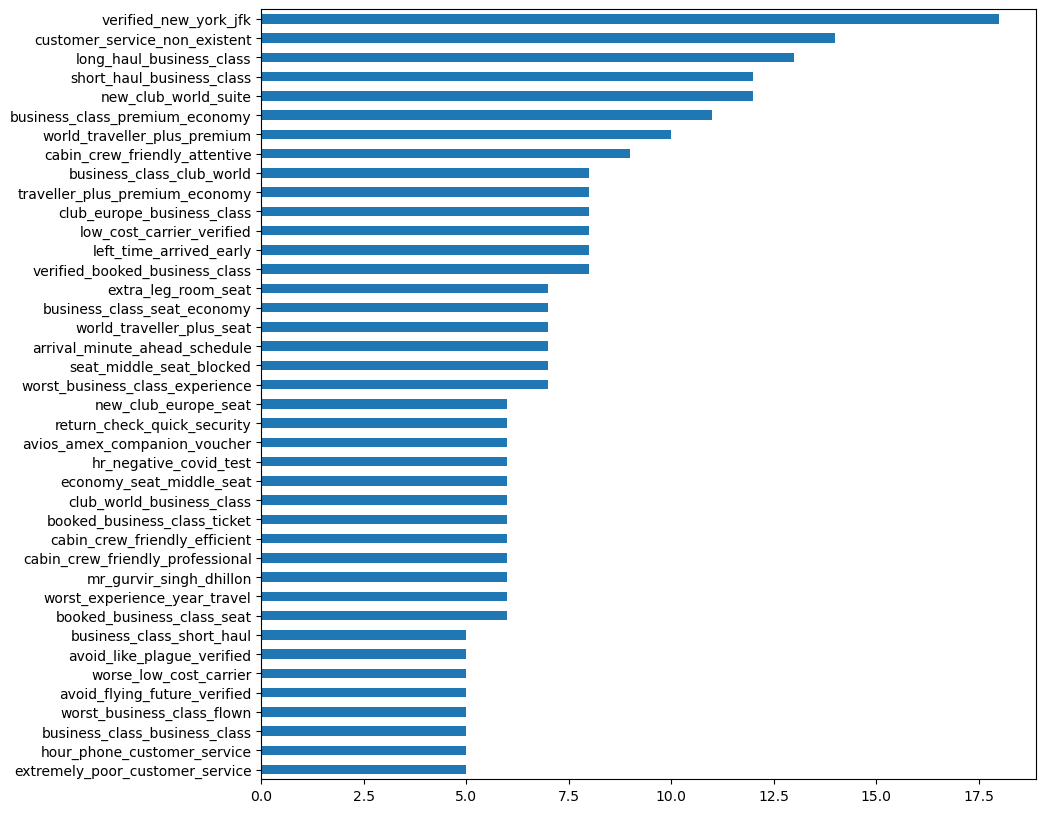

In [39]:
reviews = " ".join(df.corpus)

# Split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words, number_of_ngrams):

    from nltk import ngrams
    
    # Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    # Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    # Sort values by highest frequency 
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    # Join bigram tokens with ' '+ maintain sorting 
    ngram_joined = {"_".join(k):v for k, v in sorted(ngram_fd, key=lambda item:item[1])}

    # Convert ot pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")

    return ax

get_freq_dist(new_words, 4)

We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_friendly_helpful, cabin_crew_friendly_attentive, cabin_crew_friendly_efficient, etc. So certainly customers are providing good reviews about cabin crew staff of British Airways. 

However, there is one another approach that we can try to find the word frequencies which will give us better idea. We will group the reviews based on ratings. Say, we assume ratigs 1-3 are bad reviews, 4-6 are average/good experience and 7-10 indicates a great experience. 

In [40]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<AxesSubplot: >

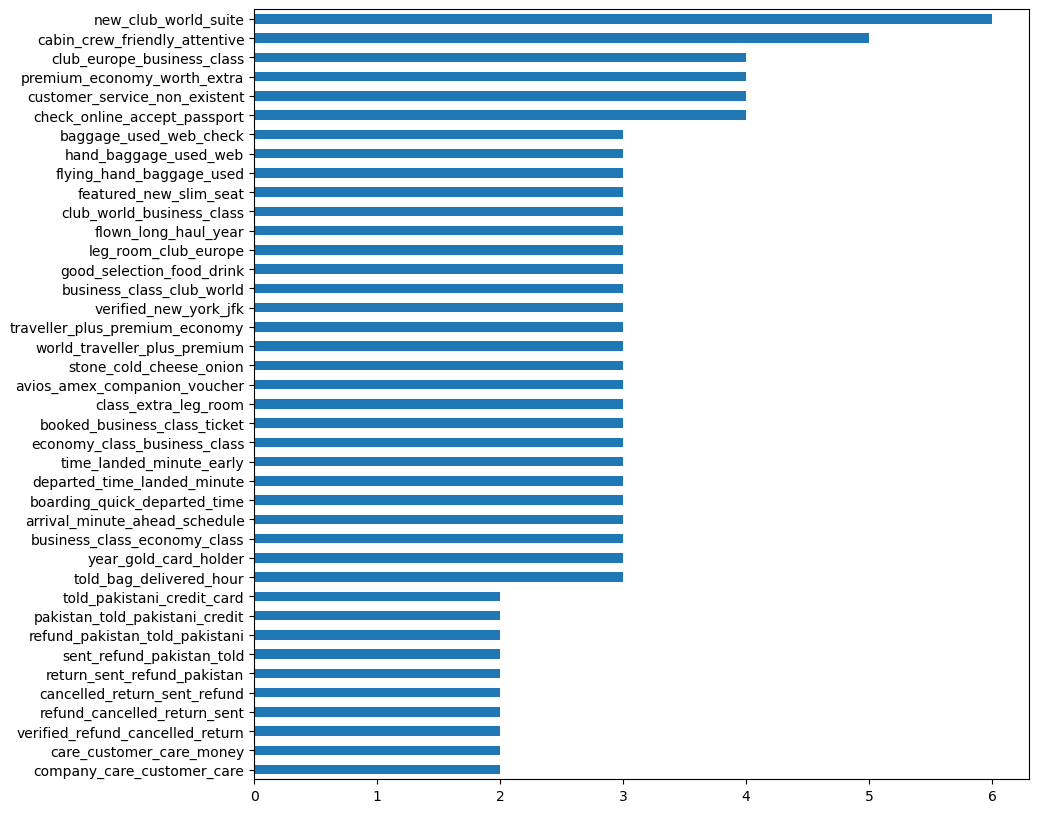

In [42]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

# split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")

new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10, 4)

<AxesSubplot: >

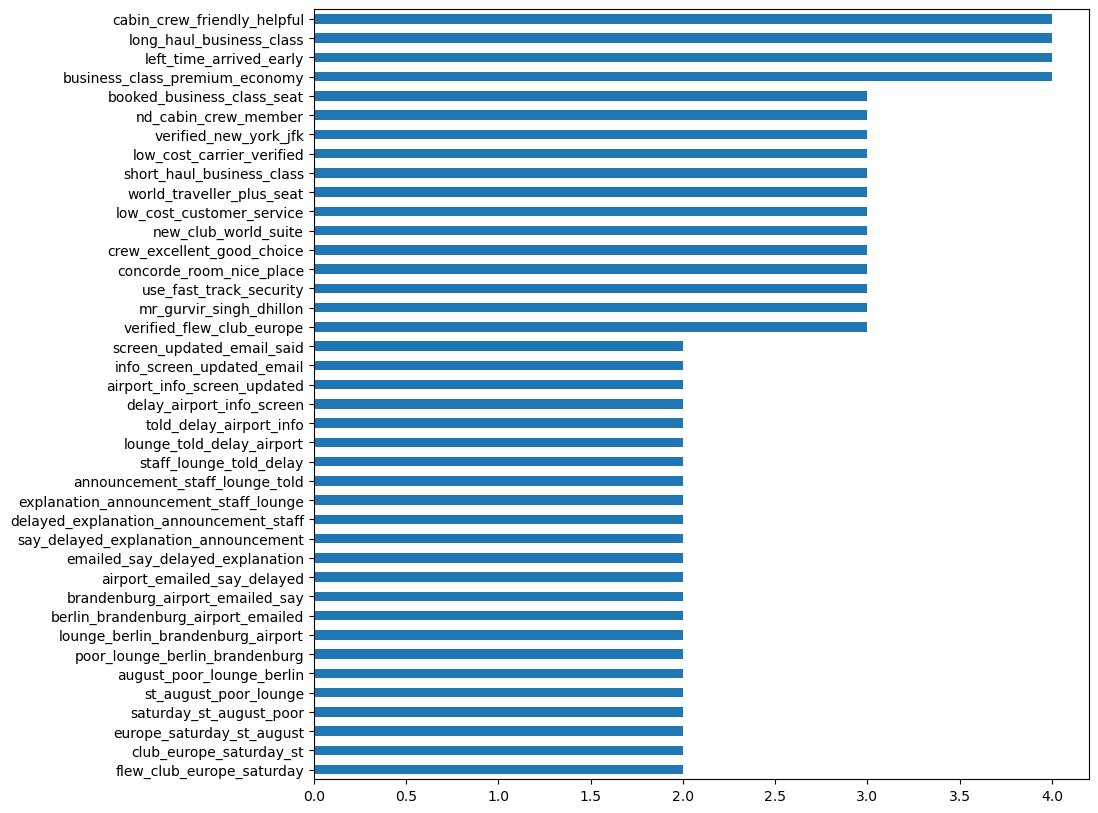

In [43]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<AxesSubplot: >

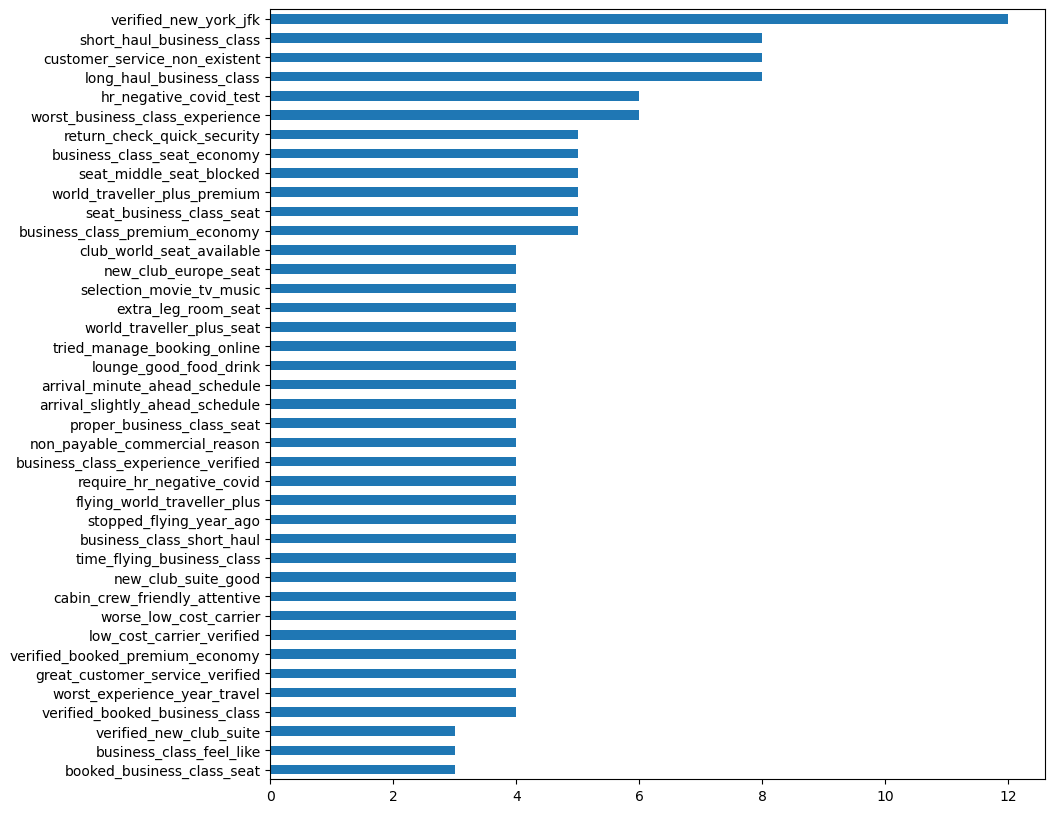

In [44]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

## Define if the text is negative or positive

In [53]:
import sys
sys.path.append('/home/hackbro/Documents/ML/Practice/AirlineQuality/venv/lib/python3.12/site-packages')
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

# set a column Polarity with all 0 values initially
df["polarity"] = 0

for i in range(len(df.corpus)):
    sent = TextBlob(df.corpus[i])
    polarity = sent.sentiment.polarity
    subjectivity = sent.sentiment.subjectivity
    df["polarity"][i] = polarity

/tmp/ipykernel_12634/2898247924.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_12634/2898247924.py:13: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [54]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")


3027 number of reviews between -0.2 and 0.2 polarity score
1793 number of reviews between -0.1 and 0.1 polarity score


Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 3027 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1. 


We will try another method of labelling the reveiws as positives or negatives. In this we will use VADER algorihtm by nltk library. 

In [57]:
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()

# Set a column polarity with all 0 values initially
df['label'] = 0

for i in range (len(df.corpus)):
    score = vds.polarity_scores(df.corpus[i])['compound']
    if score > 0.2:
        df['label'][i] = 1
    elif score < 0:
        df['label'][i] = -1
    else:
        df['label'][i] = 0

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/hackbro/nltk_data...
/tmp/ipykernel_12634/3367938086.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_12634/3367938086.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_12634/3367938086.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_12634/3367938086.py:17: SettingWithCopyWarning:


A value is trying to be set

In [58]:
df.label.value_counts()

label
 1    2665
-1    1579
 0     152
Name: count, dtype: int64

## Topic Modeling with LDA

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()

In [62]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 8
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

model.fit(tf)
topic_dict = {}

for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [63]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,flight,102.2,flight,365.9,luggage,372.0,flight,2951.6,flight,2261.4,class,557.0,flight,2958.0,seat,1693.9
1,ba,81.4,bag,311.4,airway,249.5,ba,1121.9,ba,1967.6,business,531.0,ba,1539.0,ba,659.2
2,service,67.9,crew,307.3,british,240.9,time,738.5,seat,1878.4,seat,524.1,hour,1075.3,flight,587.6
3,verified,53.1,boarding,268.4,verified,220.6,crew,723.5,good,1719.7,ba,387.6,customer,856.3,business,362.1
4,time,43.7,verified,256.9,check,197.1,hour,674.8,service,1442.8,meal,323.9,verified,826.0,class,356.8
5,one,38.8,staff,227.6,service,195.9,verified,639.1,food,1392.1,flight,317.5,british,812.3,verified,221.0
6,experience,36.3,gate,213.9,staff,189.4,service,631.2,crew,1164.9,airline,314.1,day,807.8,could,219.6
7,airline,36.1,service,190.0,flight,187.9,food,624.0,class,1122.6,one,292.1,airway,806.9,get,209.1
8,delay,33.6,cabin,181.3,bag,153.4,seat,591.4,cabin,1121.1,food,267.0,service,747.6,london,205.3
9,crew,33.4,seat,176.0,even,153.1,cabin,524.6,time,1057.2,economy,262.5,told,742.3,economy,189.2


In [64]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init="random", random_state=0)
nmf.fit_transform(tf)

array([[0.15204713, 0.02646046],
       [0.0272346 , 0.24122212],
       [0.01042258, 0.05563111],
       ...,
       [0.06187765, 0.0173138 ],
       [0.03657212, 0.04617151],
       [0.04145805, 0.06712064]])

In [65]:
topic_dict = {}

for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic = pd.DataFrame(topic_dict)

In [66]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,flight,37.0,seat,13.1
1,ba,12.9,ba,7.9
2,hour,8.7,class,6.3
3,time,6.7,business,5.1
4,london,6.0,service,5.0
5,british,5.8,food,4.8
6,airway,5.8,cabin,4.7
7,service,5.7,crew,4.6
8,verified,5.6,good,4.5
9,would,5.1,economy,3.5


With NMF algorithm as well we see there are few words that are not conclusive like "seat". So we will remove such words from the list and try topic modeling again. 